## Component 4 – EDA_Fixed

Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("All libraries imported successfully!")


All libraries imported successfully!


Load Dataset (FIXED)

In [2]:
file_path = "/content/component4_performance_fixed.csv"

df = pd.read_csv(file_path)

print("Dataset loaded successfully!")


Dataset loaded successfully!


First Look at Dataset

In [3]:
# First 5 rows
df.head()


,vehicle_id,duration,waiting_time,time_loss,route_length,average_speed,waiting_ratio,delay_ratio
0,0,68.0,0.0,7.87,863.15,12.693382,0.0,0.115735
1,22,92.0,0.0,10.71,681.20,7.404348,0.0,0.116413
2,28,86.0,0.0,8.49,719.84,8.370233,0.0,0.098721
3,40,85.0,0.0,9.53,724.48,8.523294,0.0,0.112118
4,67,101.0,0.0,14.58,680.84,6.740990,0.0,0.144356


Shape & Columns

In [4]:
# Dataset shape
print("Rows and Columns:", df.shape)


Rows and Columns: (1494, 8)


In [5]:
# Column names
df.columns


Index(['vehicle_id', 'duration', 'waiting_time', 'time_loss', 'route_length',
       'average_speed', 'waiting_ratio', 'delay_ratio'],
      dtype='object')

Dataset Information

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_id     1494 non-null   int64  
 1   duration       1494 non-null   float64
 2   waiting_time   1494 non-null   float64
 3   time_loss      1494 non-null   float64
 4   route_length   1494 non-null   float64
 5   average_speed  1494 non-null   float64
 6   waiting_ratio  1494 non-null   float64
 7   delay_ratio    1494 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 93.5 KB


Statistical Summary

In [7]:
df.describe()


,vehicle_id,duration,waiting_time,time_loss,route_length,average_speed,waiting_ratio,delay_ratio
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,952.831325,621.634538,364.848059,426.443059,2478.735475,5.381655,0.429033,0.546737
std,610.256988,494.140606,434.921519,459.394507,1206.246620,2.602426,0.280577,0.258460
min,0.000000,8.000000,0.000000,2.890000,30.930000,0.481826,0.000000,0.071424
25%,415.500000,279.250000,40.000000,78.345000,1560.007500,3.398085,0.159299,0.317099
50%,903.500000,507.000000,248.500000,313.715000,2429.625000,4.937958,0.502704,0.628209
75%,1453.750000,804.500000,498.750000,580.590000,3273.297500,7.348644,0.650872,0.753031
max,2338.000000,3497.000000,2945.000000,3086.480000,6643.030000,13.973056,0.930914,0.961317


Missing Values

In [8]:
# Missing values count
df.isnull().sum()


,0
vehicle_id,0
duration,0
waiting_time,0
time_loss,0
route_length,0
average_speed,0
waiting_ratio,0
delay_ratio,0


In [9]:
# Missing values percentage
(df.isnull().mean() * 100).round(2)


,0
vehicle_id,0.0
duration,0.0
waiting_time,0.0
time_loss,0.0
route_length,0.0
average_speed,0.0
waiting_ratio,0.0
delay_ratio,0.0


Separate Column Types

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)


Numerical Columns:
 Index(['vehicle_id', 'duration', 'waiting_time', 'time_loss', 'route_length',
       'average_speed', 'waiting_ratio', 'delay_ratio'],
      dtype='object')

Categorical Columns:
 Index([], dtype='object')


# EXPLORATORY DATA ANALYSIS (EDA)

Waiting Time Histogram

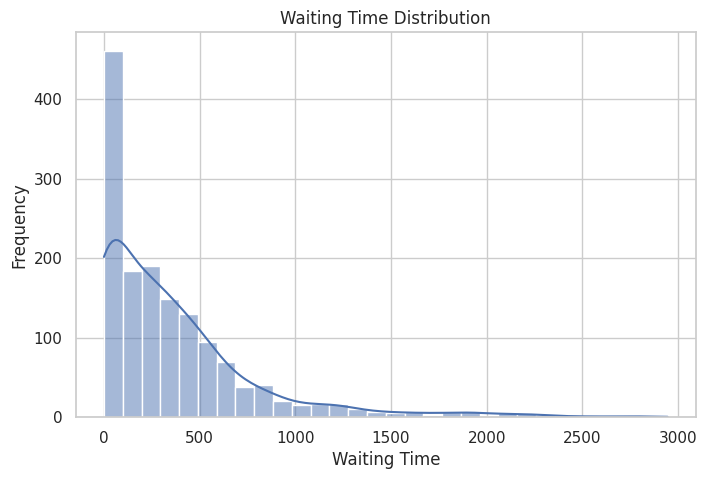

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['waiting_time'], bins=30, kde=True)
plt.title("Waiting Time Distribution")
plt.xlabel("Waiting Time")
plt.ylabel("Frequency")
plt.show()



Speed Histogram

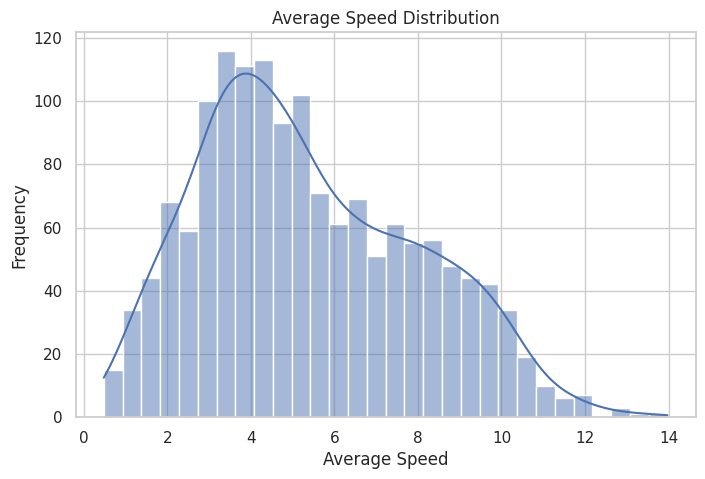

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['average_speed'], bins=30, kde=True)
plt.title("Average Speed Distribution")
plt.xlabel("Average Speed")
plt.ylabel("Frequency")
plt.show()


Waiting Time Boxplot

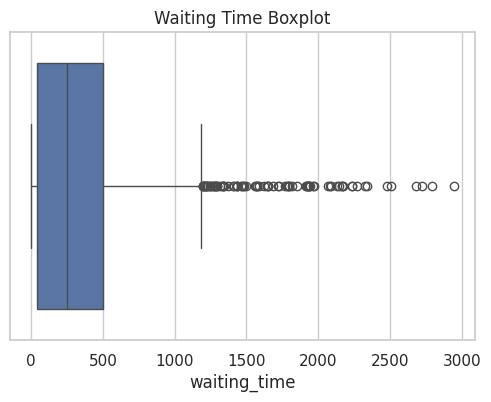

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['waiting_time'])
plt.title("Waiting Time Boxplot")
plt.show()


Speed Boxplot

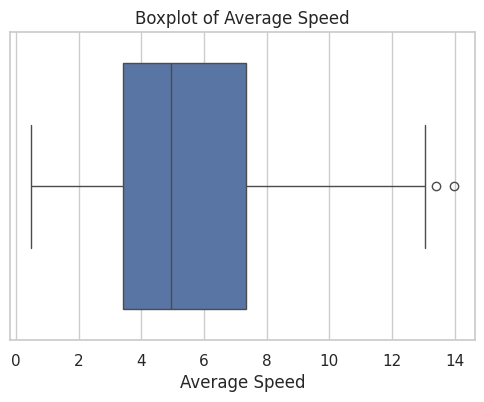

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['average_speed'])
plt.title("Boxplot of Average Speed")
plt.xlabel("Average Speed")
plt.show()


Histograms for All Numerical Columns

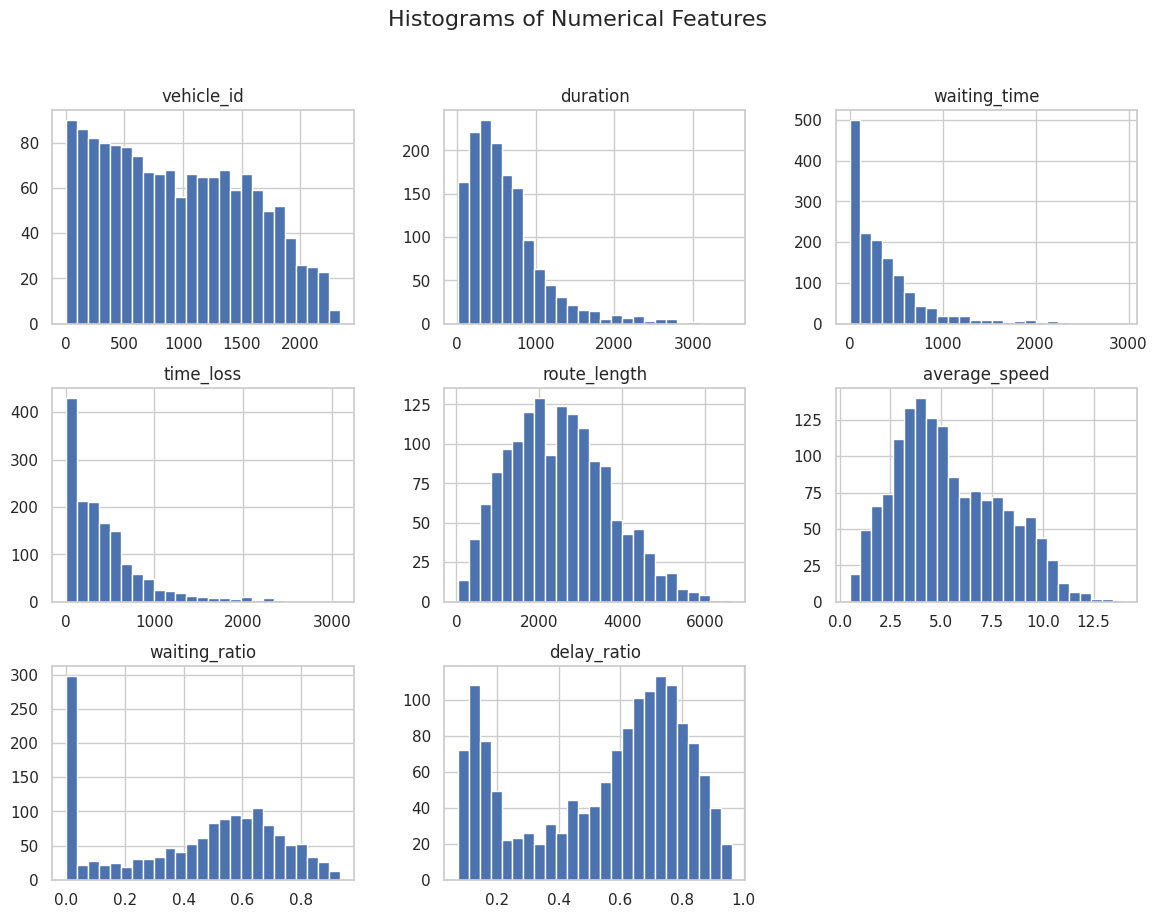

In [17]:
df[numerical_cols].hist(figsize=(14,10), bins=25)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


Boxplots for All Numerical Columns

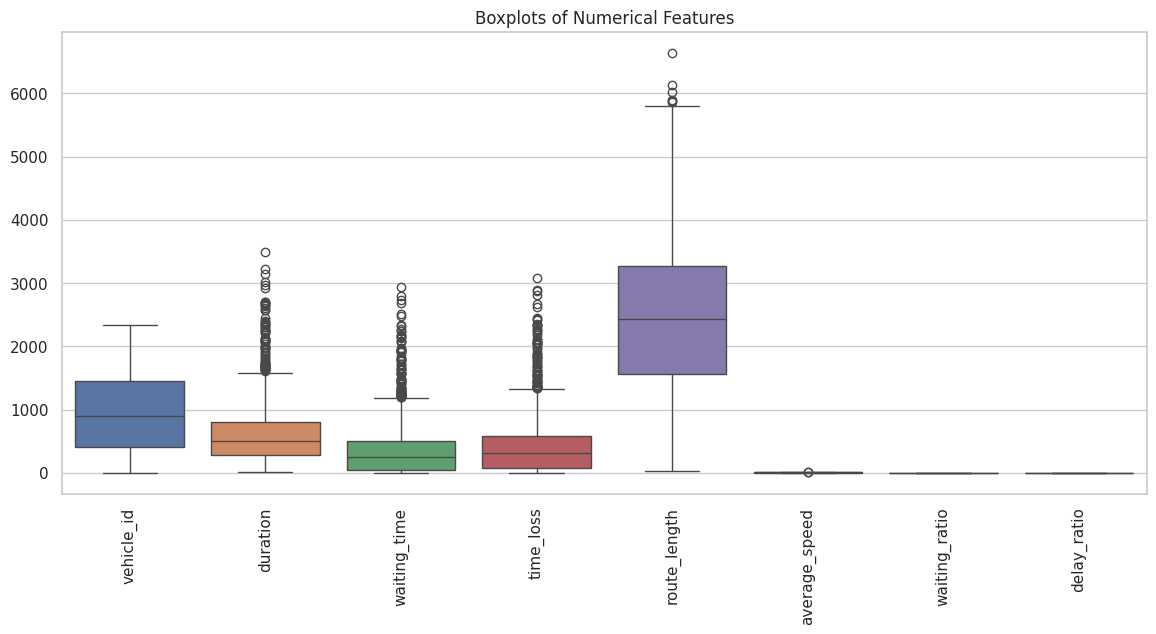

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()


Correlation Heatmap

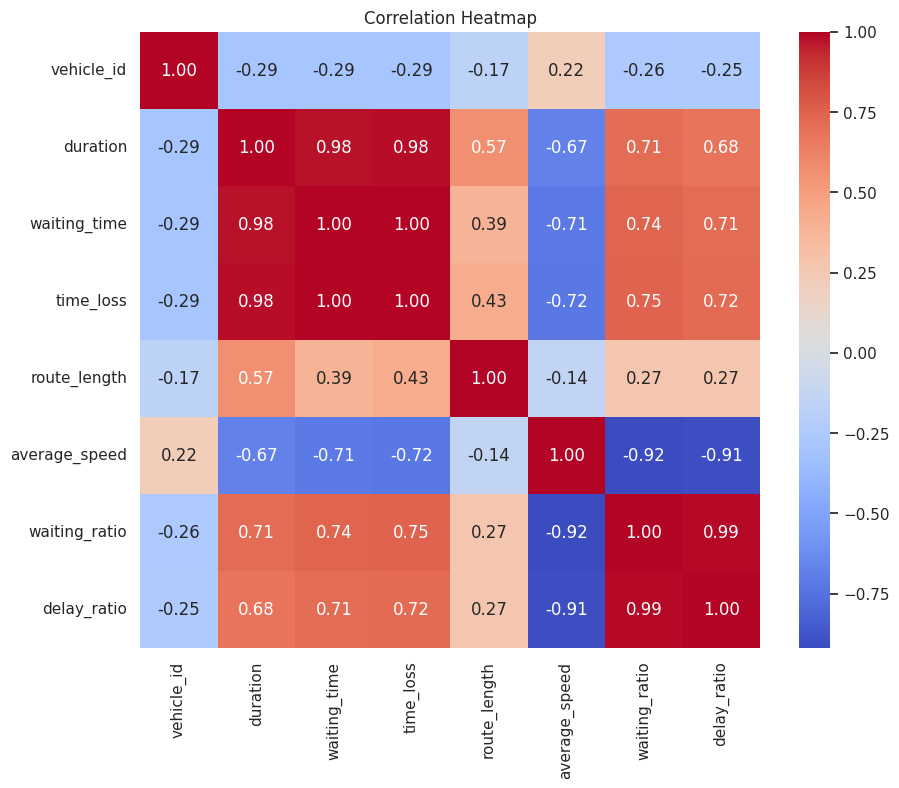

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
